# **SPIRATEC CUMMINS FILTERS**: Second Analysis

### **Author**: PhD Daniel Diaz-Almeida

#### **Task 2**: _To determine the feasibility to stablish a correlation between measured vital signs and metal values_

## Introduction

In this report, a dataset of different measurements of the Spiratec Filters has been assessed.

The porpuse of this analysis has been to determine the feasibility to stablish a relationship between measured vital signs and metal values (in ppm). In order to perform the assessment, the filter vital signs data was imported from a *.csv file into a DataFrame which had more han 1.2MM rows (observations) and 74 attributes ranging from the adquisition date to the escape gas tempeture (EGT).

The data presents a good distribution and good enough observations to perform an estimation 

In [1]:
import numpy as np
import pandas as pd

In [2]:
file = "combinedFilters_csv.csv"
%time filt_df = pd.read_csv(file, delimiter=',')
filt_df.shape

Wall time: 7.36 s


(1295116, 74)

In [3]:
newcols = {"ESN":"ESN",
           "AVL":"AVL",
           "Vehículo":"Vehicle",
           "Fecha Servidor":"Serv Date",
           "Fecha AVL":"AVL Date",
           "RPM":"RPM",
           "Pedal":"Pedal",
           "F. de Carga":"Load F",
           "Potencia":"Power",
           "Estado Motor":"Eng state",
           "Engine Torque Mode ()":"Eng Torque Mode",
           "Actual Percent Torque (%)":"Actual Torque (%)",
           "Actual Speed (RPM)":"ActSpeed (RPM)",
           "Accelerator position (%)":"AccelPosition (%)",
           "Percent Load At Current Speed (%)":"Load at CurrSpeed (%)",
           "Fuel rate (L/h)":"Fuel rate (L/h)",
           "Barometric Pressure (PSI)":"Bar Pressure (PSI)",
           "IMP-LB (PSI)":"IMP-LB (PSI)",
           "IMT-LBF (F)":"IMT-LBF (F)",
           "EGT-AV (F)":"EGT-AV (F)",
           "Battery potential (V)":"Battery pot (V)",
           "Coolant temperature (F)":"Coolant T (F)",
           "Fuel Temperature (F)":"Fuel T (F)",
           "Engine Oil Temperature (F)":"EngOil T (F)",
           "Injector Metering (PSI)":"Inject Met (PSI)",
           "Injector Timing (PSI)":"Inj Timing (PSI)",
           "Pre-filter Oil Pressure (PSI)":"Pre-filtOil Press (PSI)",
           "Instantaneous Estimated Brake Power (HP)":"InstantEst B-Power (HP)",
           "IMT-LBR (F)":"IMT-LBR (F)",
           "IMT-RBF (F)":"IMT-RBF (F)",
           "IMT-RBR (F)":"IMT-RBR (F)",
           "IMP-RB (PSI)":"IMP-RB (PSI)",
           "IMP-RB (MCRS) (PSI)":"IMP-RB (MCRS) (PSI)",
           "Oil Differential Pressure (PSI)":"OilDiff Press (PSI)",
           "Ecu temperature (F)":"Ecu T (F)",
           "EGT-01 (F)":"EGT-01 (F)",
           "EGT-02 (F)":"EGT-02 (F)",
           "EGT-03 (F)":"EGT-03 (F)",
           "EGT-04 (F)":"EGT-04 (F)",
           "EGT-05 (F)":"EGT-05 (F)",
           "EGT-06 (F)":"EGT-06 (F)",
           "EGT-07 (F)":"EGT-07 (F)",
           "EGT-08 (F)":"EGT-08 (F)",
           "EGT-09 (F)":"EGT-09 (F)",
           "EGT-10 (F)":"EGT-10 (F)",
           "EGT-11 (F)":"EGT-11 (F)",
           "EGT-12 (F)":"EGT-12 (F)",
           "EGT-13 (F)":"EGT-13 (F)",
           "EGT-14 (F)":"EGT-14 (F)",
           "EGT-15 (F)":"EGT-15 (F)",
           "EGT-16 (F)":"EGT-16 (F)",
           "Crankcase Pressure (HPI) (in-H2O)":"CC Press (HPI) (in-H2O)",
           "Engine Oil Level (%)":"EngOil Level (%)",
           "Post Oil Filter (PSI)":"PostOil Filt (PSI)",
           "Rifle Oil Pressure (PSI)":"RifleOil Press (PSI)",
           "Coolant Pressure (PSI)":"Coolant Press (PSI)",
           "Ambient Temperature (F)":"Ambient T (F)",
           "EGT-17 (F)":"EGT-17 (F)",
           "EGT-18 (F)":"EGT-18 (F)",
           "IMT-LBM (F)":"IMT-LBM (F)",
           "IMT-RBM (F)":"IMT-RBM (F)",
           "Remote accelerator pedal position (%)":"RemoAccelPedal Pos (%)",
           "Engine Pre-filter Oil Pressure (Extended Range) (PSI)":"EngPre-filterOil Pres (Extended) (PSI)",
           "Post Oil Filter (Extended Range) (PSI)":"PostOilFilt (Extended) (PSI)",
           "Engine Operating State (bit)":"EngOp State (bit)",
           "Engine Turbocharger 1 Compressor Inlet Pressure (kPa)":"EngTcharger 1 CompInlet Press (kPa)",
           "Engine Protection System has Shutdown Engine (bit)":"EngProSyst SD Eng (bit)",
           "Engine Protection System Approaching Shutdown (bit)":"EngProSyst App SD (bit)",
           "Engine Protection System Timer State (bit)":"EngProSys TS (bit)",
           "Engine Oil Filter Differential Pressure (Extended Range) (PSI)":"EngOilFiltDiff Press (Extended) (PSI)",
           "Engine Oil Priming Pump Control (bit)":"EngOilPrPump Control (bit)",
           "Engine Controlled Shutdown Request (bit)":"EngControlled SD Request (bit)",
           "Engine Emergency (Immediate) Shutdown Indication (bit)":"EngE (Immediate) SD Ind (bit)",
           "Power (HP)":"Power (HP)"}

The column names were shortened for more readability. Below is presented the actual columns names of the filter vital signs DataFrame, filt_df.

In [4]:
filt_df.rename(columns=newcols, inplace=True)
filt_df.columns.values

array(['ESN', 'AVL', 'Vehicle', 'Serv Date', 'AVL Date', 'RPM', 'Pedal',
       'Load F', 'Power', 'Eng state', 'Eng Torque Mode',
       'Actual Torque (%)', 'ActSpeed (RPM)', 'AccelPosition (%)',
       'Load at CurrSpeed (%)', 'Fuel rate (L/h)', 'Bar Pressure (PSI)',
       'IMP-LB (PSI)', 'IMT-LBF (F)', 'EGT-AV (F)', 'Battery pot (V)',
       'Coolant T (F)', 'Fuel T (F)', 'EngOil T (F)', 'Inject Met (PSI)',
       'Inj Timing (PSI)', 'Pre-filtOil Press (PSI)',
       'InstantEst B-Power (HP)', 'IMT-LBR (F)', 'IMT-RBF (F)',
       'IMT-RBR (F)', 'IMP-RB (PSI)', 'IMP-RB (MCRS) (PSI)',
       'OilDiff Press (PSI)', 'Ecu T (F)', 'EGT-01 (F)', 'EGT-02 (F)',
       'EGT-03 (F)', 'EGT-04 (F)', 'EGT-05 (F)', 'EGT-06 (F)',
       'EGT-07 (F)', 'EGT-08 (F)', 'EGT-09 (F)', 'EGT-10 (F)',
       'EGT-11 (F)', 'EGT-12 (F)', 'EGT-13 (F)', 'EGT-14 (F)',
       'EGT-15 (F)', 'EGT-16 (F)', 'CC Press (HPI) (in-H2O)',
       'EngOil Level (%)', 'PostOil Filt (PSI)', 'RifleOil Press (PSI)',
       'Co

The metal values were imported from a *xlsx* file with one sheet and 23 entries. The file was loaded into a DataFrame called metal_values and the information in it is shown below as well as the DataFrame

In [5]:
metal_values = pd.read_excel("filtersMetalWeights.xlsx", sheet_name='490', thousands=',')
metal_values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Vehicle  15 non-null     int64  
 1   Fe       15 non-null     int64  
 2   Pb       15 non-null     float64
 3   Cu       15 non-null     float64
 4   Sn       15 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 728.0 bytes


In [6]:
metal_values

,Vehicle,Fe,Pb,Cu,Sn
0,116,10,0.1,0.9,0.7
1,117,10,0.1,0.9,0.7
2,119,10,0.1,0.9,0.7
3,126,10,0.1,0.9,0.7
4,129,10,0.1,0.9,0.7
5,130,10,0.1,0.9,0.7
6,150,10,0.1,0.9,0.7
7,155,10,0.1,0.9,0.7
8,161,10,0.1,0.9,0.7
9,57,10,0.1,0.9,0.7


In [7]:
vehicles = [filt_df.Vehicle.unique()[i] for i in range(15)]

In [8]:
def metal_values(sheet_n, vehicles, thousand):
    '''
    Extract the metal value (in ppm) for filter in an excel file which contains the data
    
    sheet_n   : Name of sheet in the excel file where the data for the tribologyc analysis is stored
    vehicles  : A list with the name of filter vehicles
    thousands : Type of thousands separetor (',' or '.')
    
    It returns a DataFrame
    
    '''
    metal_values = pd.read_excel("filtersMetalWeights.xlsx", sheet_name=sheet_n, thousands=thousand)
    colist=[np.hstack([(np.repeat(metal_values.iloc[i,j], np.sum(filt_df.Vehicle == vehicles[i]))) for i in range(metal_values.shape[0])]).flatten() for j in range(metal_values.shape[1])]
    
    metal_values_arr = np.asarray(colist[1:]).transpose()
    metal_values_coln = metal_values.iloc[:,1:].columns
    
    metal_values_df = pd.DataFrame(metal_values_arr, columns=metal_values_coln)
    
    return metal_values_df


In [9]:
metal_values_df_490 = metal_values(sheet_n='490', vehicles=vehicles, thousand=',')
metal_values_df_483 = metal_values(sheet_n='483', vehicles=vehicles, thousand=',')
metal_values_df_360 = metal_values(sheet_n='360', vehicles=vehicles, thousand=',')
metal_values_df_554 = metal_values(sheet_n='554', vehicles=vehicles, thousand=',')

Then, the metal_value DataFrame was concatenated with the filt_df one in order to obtain a single DataFrame which store all data information. The new DF has a the shape 1295116 x 96. The first five observations (rows) are shown

In [10]:
filt_df_mv490 = pd.concat([filt_df, metal_values_df_490],axis=1)
filt_df_mv483 = pd.concat([filt_df, metal_values_df_483],axis=1)
filt_df_mv360 = pd.concat([filt_df, metal_values_df_360],axis=1)
filt_df_mv554 = pd.concat([filt_df, metal_values_df_554],axis=1)
filt_df_mv490.shape

(1295116, 78)

In [11]:
filt_df_mv490.head()

,ESN,AVL,Vehicle,Serv Date,AVL Date,RPM,Pedal,Load F,Power,Eng state,...,EngProSys TS (bit),EngOilFiltDiff Press (Extended) (PSI),EngOilPrPump Control (bit),EngControlled SD Request (bit),EngE (Immediate) SD Ind (bit),Power (HP),Fe,Pb,Cu,Sn
0,66301308,7156,CA-116,2019-06-24 14:28:36,2019-06-24 14:28:36,1880.00,100.0,100.0,3276.24,Transicion,...,3.0,3.63,3.0,0.0,0.0,3276.24,10.0,0.1,0.9,0.7
1,66301308,7156,CA-116,2019-06-24 14:29:26,2019-06-24 14:28:51,1915.50,99.2,100.0,3302.59,Transicion,...,3.0,2.18,3.0,0.0,0.0,3302.59,10.0,0.1,0.9,0.7
2,66301308,7156,CA-116,2019-06-24 14:29:26,2019-06-24 14:29:06,1897.63,98.8,100.0,3306.96,Potencia,...,3.0,5.80,3.0,0.0,0.0,3306.96,10.0,0.1,0.9,0.7
3,66301308,7156,CA-116,2019-06-24 14:29:26,2019-06-24 14:29:21,1906.75,98.8,100.0,3322.85,Potencia,...,3.0,5.08,3.0,0.0,0.0,3322.85,10.0,0.1,0.9,0.7
4,66301308,7156,CA-116,2019-06-24 14:29:41,2019-06-24 14:29:36,1915.25,99.2,100.0,3302.16,Potencia,...,3.0,0.73,3.0,0.0,0.0,3302.16,10.0,0.1,0.9,0.7


In [12]:
cols2drop = ['AVL', 
             'Serv Date',
             'AVL Date', 
             'EngOp State (bit)', 
             'EngProSyst SD Eng (bit)', 
             'EngProSyst App SD (bit)',
             'EngProSys TS (bit)', 
             'EngOilPrPump Control (bit)', 
             'EngControlled SD Request (bit)', 
             'EngE (Immediate) SD Ind (bit)', 
             'EngOil Level (%)',
             'IMT-LBF (F)',
             'EGT-AV (F)',
             'Coolant T (F)',
             'Fuel T (F)',
             'EngOil T (F)',
             'IMT-LBR (F)',
             'IMT-RBF (F)',
             'IMT-RBR (F)',
             'Ecu T (F)',
             'EGT-01 (F)',
             'EGT-02 (F)',
             'EGT-03 (F)',
             'EGT-04 (F)',
             'EGT-05 (F)',
             'EGT-06 (F)',
             'EGT-07 (F)',
             'EGT-08 (F)',
             'EGT-09 (F)',
             'EGT-10 (F)',
             'EGT-11 (F)',
             'EGT-12 (F)',
             'EGT-13 (F)',
             'EGT-14 (F)',
             'EGT-15 (F)',
             'EGT-16 (F)',
             'Ambient T (F)',
             'EGT-17 (F)',
             'EGT-18 (F)',
             'IMT-LBM (F)',
             'IMT-RBM (F)',
             'Power']

The attributes related to the combustion as well as with mass increase in fiters were drop from the DataFrame. The new DF is called filt_df_mv1 which store the data of metal values and attributes related with loads. The shape of the new DF is:

In [13]:
filt_df_mv490_1 = filt_df_mv490.drop(cols2drop, axis=1)
filt_df_mv483_1 = filt_df_mv483.drop(cols2drop, axis=1)
filt_df_mv360_1 = filt_df_mv360.drop(cols2drop, axis=1)
filt_df_mv554_1 = filt_df_mv554.drop(cols2drop, axis=1)
filt_df_mv490_1.shape

(1295116, 36)

The data skewness and kurtosis are given below

**Skewness**

In [14]:
filt_df_mv490_1.skew()

ESN                                         0.265188
RPM                                        -0.010696
Pedal                                      -0.507004
Load F                                    -13.399179
Eng Torque Mode                             0.453043
Actual Torque (%)                          -9.062502
ActSpeed (RPM)                             -0.105978
AccelPosition (%)                          -1.116263
Load at CurrSpeed (%)                    -295.568581
Fuel rate (L/h)                           -26.340423
Bar Pressure (PSI)                          0.814126
IMP-LB (PSI)                               -3.674770
Battery pot (V)                            -8.289961
Inject Met (PSI)                          -12.063574
Inj Timing (PSI)                           -2.519908
Pre-filtOil Press (PSI)                   -56.403270
InstantEst B-Power (HP)                   -30.193353
IMP-RB (PSI)                               -4.640551
IMP-RB (MCRS) (PSI)                        -4.

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

A matrix of histograms showing the distribution of each vital sign data is presented. The attributes data have a bell-like behaviour which means a symmetric distribution overall. In contrast with the previous analysis, the data distribution for this DF presents more discrete values 

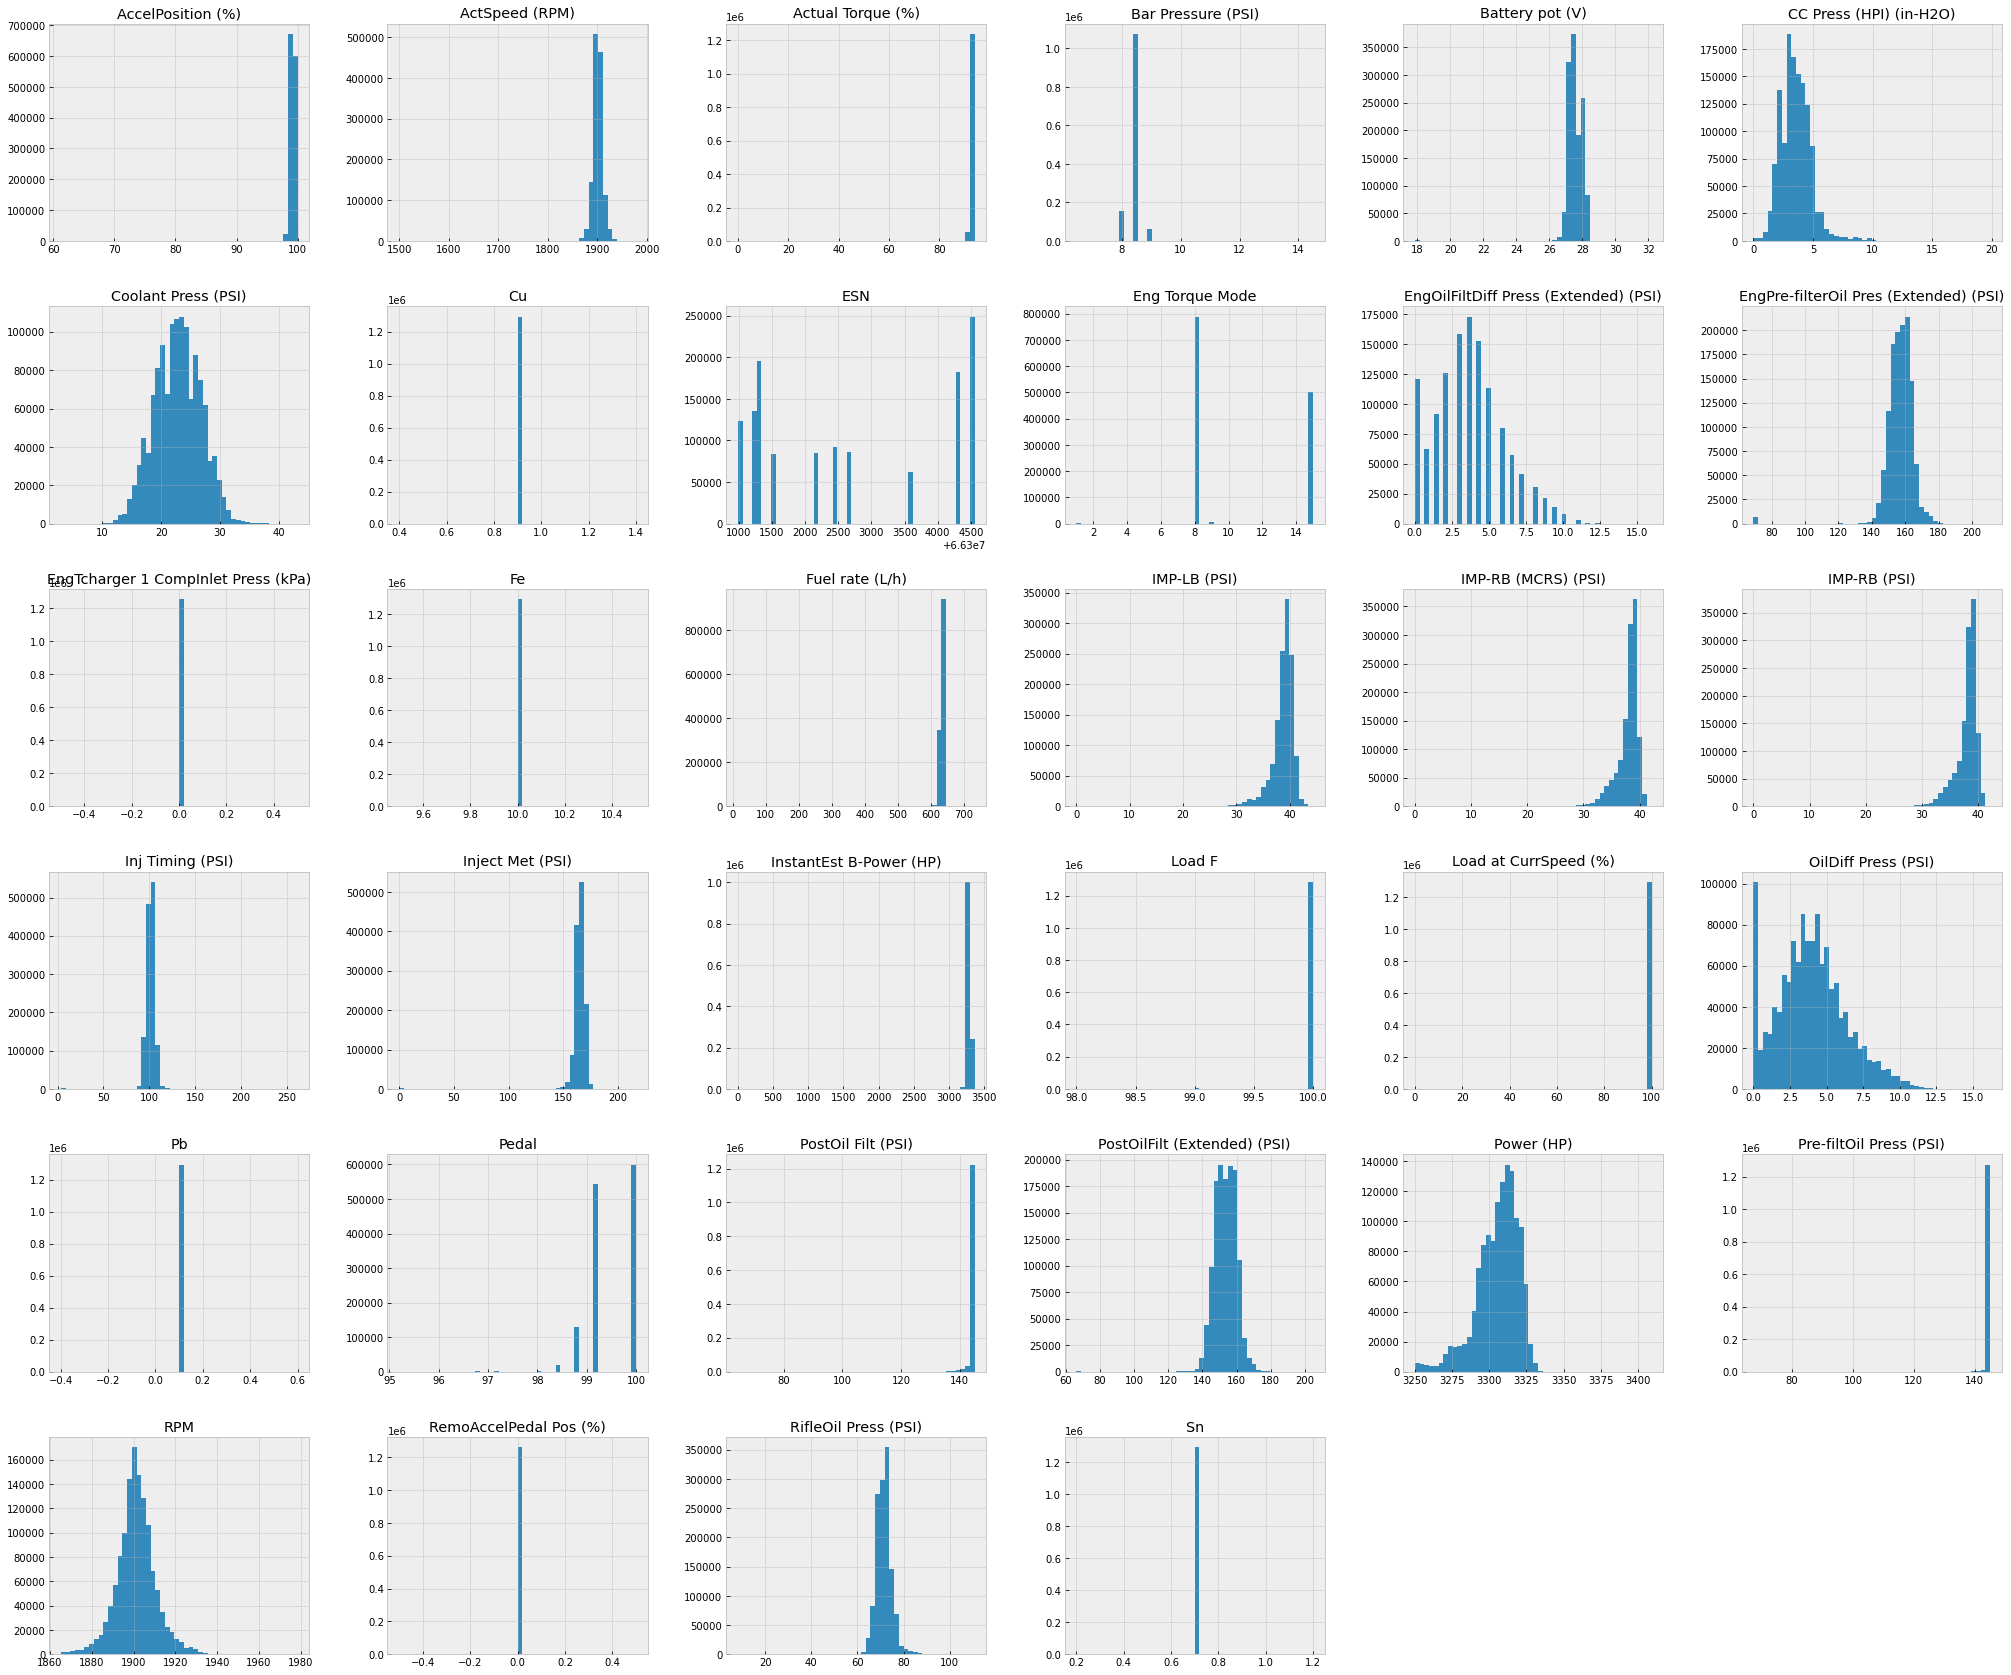

In [16]:
filt_df_mv490_1.hist(bins=50, figsize=(35,30))
plt.show()

**Kurtosis**

In [17]:
filt_df_mv490_1.kurtosis(axis=0, skipna=True)

ESN                                           -1.629814
RPM                                            1.312998
Pedal                                          0.631682
Load F                                       196.163611
Eng Torque Mode                               -1.748121
Actual Torque (%)                           1040.825205
ActSpeed (RPM)                                 5.178715
AccelPosition (%)                             46.377185
Load at CurrSpeed (%)                     168384.234726
Fuel rate (L/h)                             1284.227945
Bar Pressure (PSI)                            25.136968
IMP-LB (PSI)                                  32.020291
Battery pot (V)                              145.881810
Inject Met (PSI)                             188.904190
Inj Timing (PSI)                             124.170529
Pre-filtOil Press (PSI)                     4498.837199
InstantEst B-Power (HP)                     1002.011253
IMP-RB (PSI)                                  51

## **Data Correlation**: Intermediate laboratory inspections

Finally, a **correlation matrix** has been computed by means of the estandard correlation coefficient (also called _Pearson's r_) between every pair of attributes using the corr() method from the Pandas library.

### Intermediate inspection 490

In [18]:
corr_matrix490 = filt_df_mv490_1.corr(method='pearson')

The correlation matrix has been applied to every metal value against every other attribute

**Fe**

In [19]:
%time corr_matrix490["Fe"].sort_values(ascending=False)

Wall time: 999 µs


ESN                                      NaN
RPM                                      NaN
Pedal                                    NaN
Load F                                   NaN
Eng Torque Mode                          NaN
Actual Torque (%)                        NaN
ActSpeed (RPM)                           NaN
AccelPosition (%)                        NaN
Load at CurrSpeed (%)                    NaN
Fuel rate (L/h)                          NaN
Bar Pressure (PSI)                       NaN
IMP-LB (PSI)                             NaN
Battery pot (V)                          NaN
Inject Met (PSI)                         NaN
Inj Timing (PSI)                         NaN
Pre-filtOil Press (PSI)                  NaN
InstantEst B-Power (HP)                  NaN
IMP-RB (PSI)                             NaN
IMP-RB (MCRS) (PSI)                      NaN
OilDiff Press (PSI)                      NaN
CC Press (HPI) (in-H2O)                  NaN
PostOil Filt (PSI)                       NaN
RifleOil P

**Pb**

In [20]:
%time corr_matrix490["Pb"].sort_values(ascending=False)

Wall time: 996 µs


Cu                                        1.000000e+00
Pb                                        1.000000e+00
RPM                                       3.434423e-09
ActSpeed (RPM)                            3.430386e-09
Pedal                                     1.344980e-09
AccelPosition (%)                         1.339569e-09
Bar Pressure (PSI)                        1.247774e-09
Battery pot (V)                           2.819230e-10
RifleOil Press (PSI)                      5.365072e-11
InstantEst B-Power (HP)                   3.034866e-11
Inj Timing (PSI)                          1.673889e-11
Coolant Press (PSI)                       6.640435e-12
Inject Met (PSI)                          4.951864e-12
EngOilFiltDiff Press (Extended) (PSI)     1.517190e-12
Eng Torque Mode                           9.089936e-13
Actual Torque (%)                         1.291564e-13
Load F                                    2.865912e-14
Load at CurrSpeed (%)                    -2.331878e-14
EngPre-fil

**Cu**

In [21]:
%time corr_matrix490["Cu"].sort_values(ascending=False)

Wall time: 687 µs


Pb                                        1.000000e+00
Cu                                        1.000000e+00
RPM                                       3.434398e-09
ActSpeed (RPM)                            3.430502e-09
Pedal                                     1.346062e-09
AccelPosition (%)                         1.338417e-09
Bar Pressure (PSI)                        1.247548e-09
Battery pot (V)                           2.817163e-10
RifleOil Press (PSI)                      5.400893e-11
InstantEst B-Power (HP)                   3.030500e-11
Inj Timing (PSI)                          1.677026e-11
Coolant Press (PSI)                       6.532919e-12
Inject Met (PSI)                          4.798550e-12
EngOilFiltDiff Press (Extended) (PSI)     1.543585e-12
ESN                                       1.189252e-12
Actual Torque (%)                         3.207353e-14
Load F                                    1.076537e-14
Load at CurrSpeed (%)                    -1.036684e-14
EngPre-fil

**Sn**

In [22]:
%time corr_matrix490["Sn"].sort_values(ascending=False)

Wall time: 997 µs


Sn                                        1.000000e+00
Power (HP)                                6.847631e-10
Pre-filtOil Press (PSI)                   3.396299e-10
PostOil Filt (PSI)                        1.814431e-10
Fuel rate (L/h)                           7.873963e-11
IMP-LB (PSI)                              3.265979e-11
IMP-RB (PSI)                              1.176136e-11
IMP-RB (MCRS) (PSI)                       9.730032e-12
PostOilFilt (Extended) (PSI)              7.499199e-12
CC Press (HPI) (in-H2O)                   5.801150e-12
OilDiff Press (PSI)                       1.437779e-12
Eng Torque Mode                           7.327706e-13
EngPre-filterOil Pres (Extended) (PSI)    2.964345e-13
Load at CurrSpeed (%)                     5.243323e-15
Actual Torque (%)                        -4.619871e-15
Load F                                   -6.050192e-14
EngOilFiltDiff Press (Extended) (PSI)    -1.560277e-12
ESN                                      -2.706297e-12
Inject Met

In [23]:
import seaborn as sns
def heat_map(corr_matrix):
    mask = np.zeros_like(corr_matrix)
    mask[np.triu_indices_from(mask)] = True
    with sns.axes_style("white"):
        f, ax = plt.subplots(figsize=(14, 12))
        ax = sns.heatmap(corr_matrix, mask=mask, linewidths=.1, vmin=-1, vmax=1, square=True)
        return plt.show(ax)

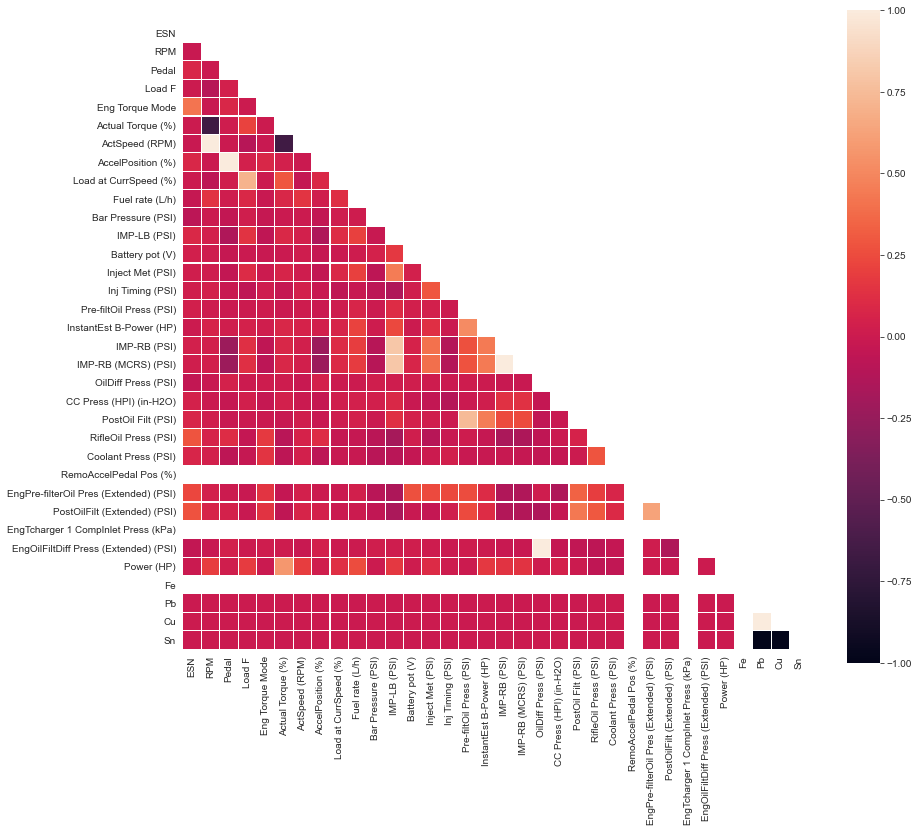

In [24]:
heat_map(corr_matrix490)

### Intermediate inspection 483

In [25]:
corr_matrix483 = filt_df_mv483_1.corr(method='pearson')

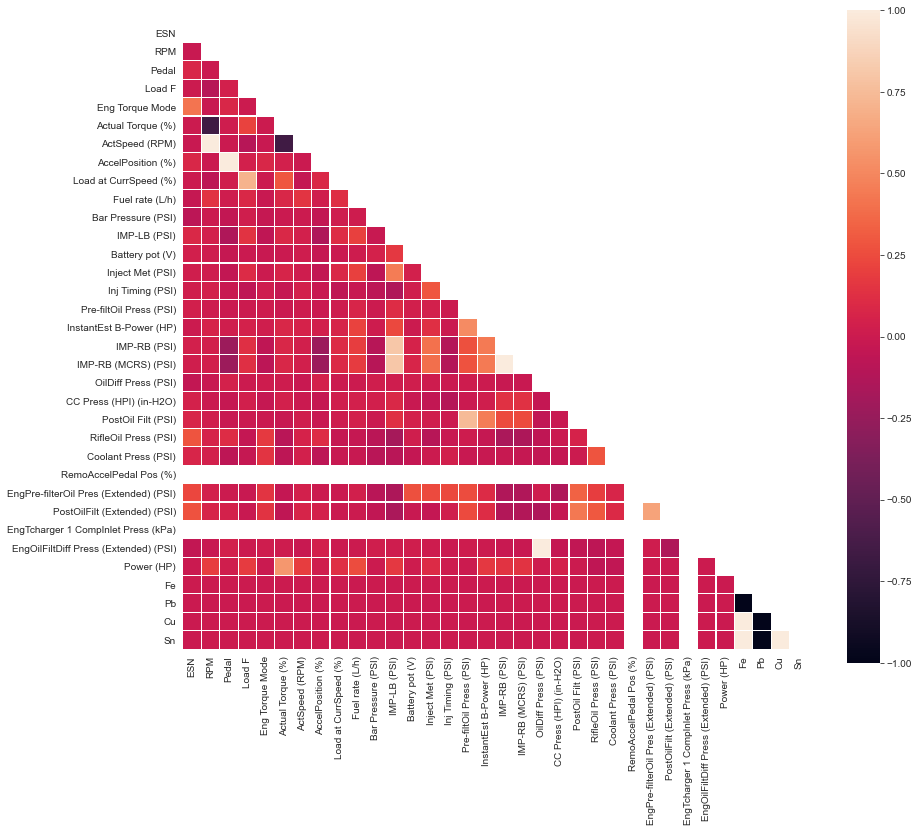

In [26]:
heat_map(corr_matrix483)

### Intermediate inspection 360

In [27]:
corr_matrix360 = filt_df_mv360_1.corr(method='pearson')

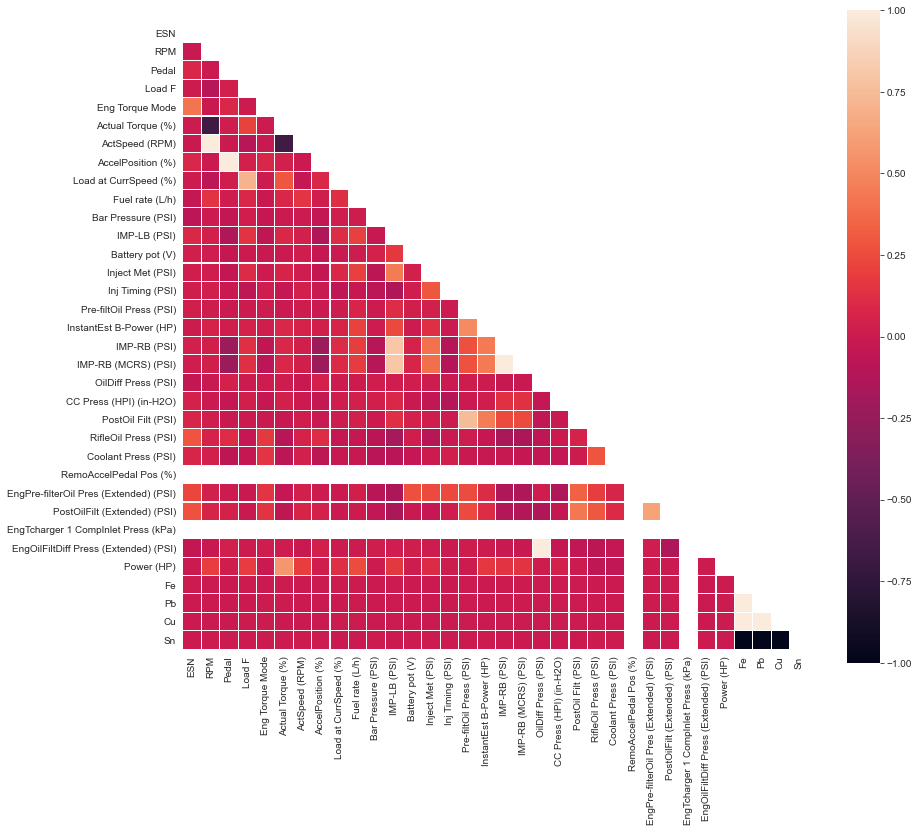

In [28]:
heat_map(corr_matrix360)

### Intermediate inspection 554 

In [29]:
corr_matrix554 = filt_df_mv554_1.corr(method='pearson')

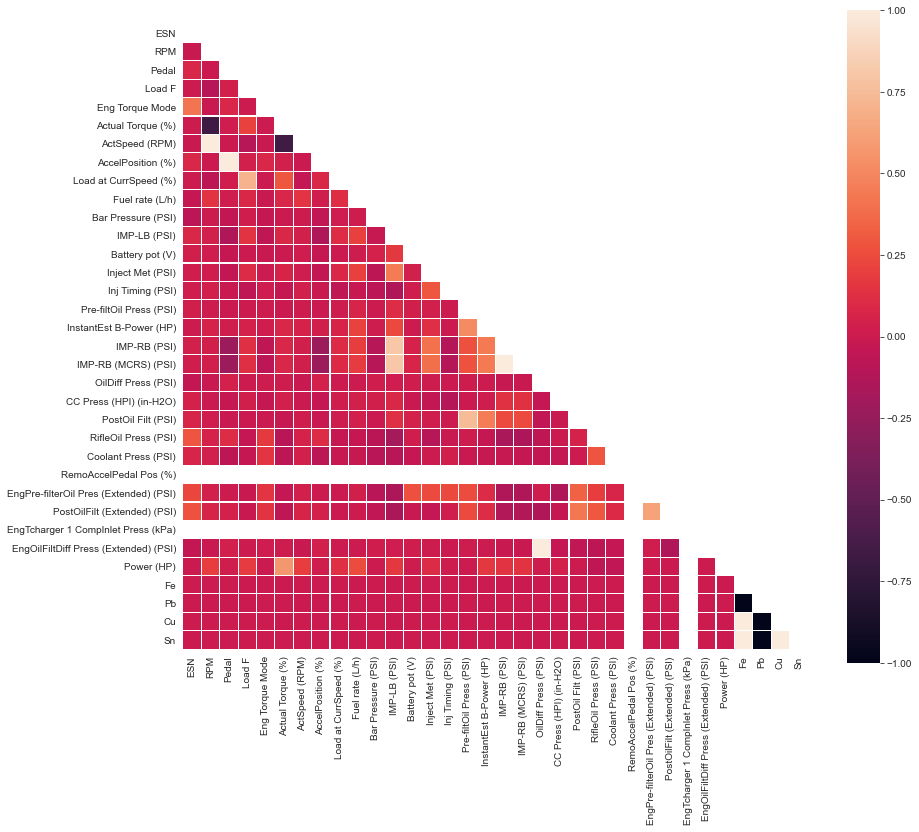

In [30]:
heat_map(corr_matrix554)

### **Second Comparison**

In [31]:
cols2drop =['ESN','AVL','RPM', 'Pedal', 'Load F','Power','Eng Torque Mode', 
            'Actual Torque (%)', 'ActSpeed (RPM)', 'AccelPosition (%)',
           'Load at CurrSpeed (%)', 'Fuel rate (L/h)', 'Bar Pressure (PSI)',
           'IMP-LB (PSI)','Battery pot (V)','Inject Met (PSI)',
           'Inj Timing (PSI)', 'Pre-filtOil Press (PSI)',
           'InstantEst B-Power (HP)','IMP-RB (PSI)', 'IMP-RB (MCRS) (PSI)',
           'OilDiff Press (PSI)','CC Press (HPI) (in-H2O)',
           'EngOil Level (%)', 'PostOil Filt (PSI)', 'RifleOil Press (PSI)',
           'Coolant Press (PSI)', 'RemoAccelPedal Pos (%)',
           'EngPre-filterOil Pres (Extended) (PSI)',
           'PostOilFilt (Extended) (PSI)', 'EngOp State (bit)',
           'EngTcharger 1 CompInlet Press (kPa)', 'EngProSyst SD Eng (bit)',
           'EngProSyst App SD (bit)', 'EngProSys TS (bit)',
           'EngOilFiltDiff Press (Extended) (PSI)',
           'EngOilPrPump Control (bit)', 'EngControlled SD Request (bit)',
           'EngE (Immediate) SD Ind (bit)', 'Power (HP)']

In order to obtain a better inside about the correlation between the filter metal values and the vital signs, a second comparison has been carried out. The attributes related to combustion have been considered for correlation

In [32]:
filt_df_mv490_2 = filt_df_mv490.drop(cols2drop, axis=1)
filt_df_mv483_2 = filt_df_mv483.drop(cols2drop, axis=1)
filt_df_mv360_2 = filt_df_mv360.drop(cols2drop, axis=1)
filt_df_mv554_2 = filt_df_mv554.drop(cols2drop, axis=1)
filt_df_mv490_2.shape

(1295116, 38)

### Intermediate inspection 490

In [33]:
corr_matrix490 = filt_df_mv490_2.corr(method='pearson')

As before, the correlation matrix has been applied to every filter metal value against every attribute

**Fe**

In [34]:
%time corr_matrix490["Fe"].sort_values(ascending=False)

Wall time: 1.16 ms


IMT-LBF (F)     NaN
EGT-AV (F)      NaN
Coolant T (F)   NaN
Fuel T (F)      NaN
EngOil T (F)    NaN
IMT-LBR (F)     NaN
IMT-RBF (F)     NaN
IMT-RBR (F)     NaN
Ecu T (F)       NaN
EGT-01 (F)      NaN
EGT-02 (F)      NaN
EGT-03 (F)      NaN
EGT-04 (F)      NaN
EGT-05 (F)      NaN
EGT-06 (F)      NaN
EGT-07 (F)      NaN
EGT-08 (F)      NaN
EGT-09 (F)      NaN
EGT-10 (F)      NaN
EGT-11 (F)      NaN
EGT-12 (F)      NaN
EGT-13 (F)      NaN
EGT-14 (F)      NaN
EGT-15 (F)      NaN
EGT-16 (F)      NaN
Ambient T (F)   NaN
EGT-17 (F)      NaN
EGT-18 (F)      NaN
IMT-LBM (F)     NaN
IMT-RBM (F)     NaN
Fe              NaN
Pb              NaN
Cu              NaN
Sn              NaN
Name: Fe, dtype: float64

**Pb**

In [35]:
%time corr_matrix490["Pb"].sort_values(ascending=False)

Wall time: 998 µs


Cu               1.000000e+00
Pb               1.000000e+00
Coolant T (F)    3.507024e-11
IMT-LBF (F)      3.028473e-11
EGT-17 (F)       1.877951e-11
EGT-12 (F)       1.279679e-11
EGT-08 (F)       1.206765e-11
EGT-15 (F)       1.161978e-11
EGT-10 (F)       1.146645e-11
EGT-01 (F)       1.076898e-11
EGT-11 (F)       9.898290e-12
EGT-13 (F)       9.063792e-12
EGT-02 (F)       9.009056e-12
EGT-16 (F)       8.713970e-12
EGT-14 (F)       8.085055e-12
EGT-05 (F)       6.430363e-12
EGT-07 (F)       5.964459e-12
EGT-AV (F)       4.911417e-12
EGT-03 (F)       4.904156e-12
EGT-06 (F)       4.793395e-12
EGT-04 (F)       4.185880e-12
Ecu T (F)        3.229789e-12
IMT-RBR (F)      2.734521e-12
EGT-09 (F)       1.081472e-12
Ambient T (F)    5.075380e-14
IMT-LBM (F)     -1.171426e-12
EGT-18 (F)      -1.816981e-12
EngOil T (F)    -7.188941e-12
IMT-RBF (F)     -7.250108e-12
IMT-RBM (F)     -1.906257e-11
IMT-LBR (F)     -2.038597e-11
Fuel T (F)      -2.070157e-11
Sn              -1.000000e+00
Fe        

**Cu**

In [36]:
%time corr_matrix490["Cu"].sort_values(ascending=False)

Wall time: 367 µs


Pb               1.000000e+00
Cu               1.000000e+00
Coolant T (F)    3.445888e-11
IMT-LBF (F)      3.021033e-11
EGT-17 (F)       1.819050e-11
EGT-12 (F)       1.295018e-11
EGT-08 (F)       1.266846e-11
EGT-11 (F)       1.200255e-11
EGT-10 (F)       1.151188e-11
EGT-15 (F)       1.150702e-11
EGT-01 (F)       1.087746e-11
EGT-13 (F)       9.079341e-12
EGT-02 (F)       8.943737e-12
EGT-16 (F)       8.586456e-12
EGT-14 (F)       7.995403e-12
EGT-05 (F)       6.237762e-12
EGT-07 (F)       5.906794e-12
EGT-06 (F)       5.213995e-12
EGT-AV (F)       4.983957e-12
EGT-03 (F)       4.850221e-12
EGT-04 (F)       4.367331e-12
Ecu T (F)        2.940390e-12
IMT-RBR (F)      1.893428e-12
EGT-09 (F)       1.327073e-12
Ambient T (F)    1.189075e-13
IMT-LBM (F)     -1.103497e-12
EGT-18 (F)      -1.699984e-12
IMT-RBF (F)     -5.900292e-12
EngOil T (F)    -7.137536e-12
Fuel T (F)      -1.845654e-11
IMT-LBR (F)     -2.012452e-11
IMT-RBM (F)     -2.342408e-11
Sn              -1.000000e+00
Fe        

**Sn**

In [37]:
%time corr_matrix490["Sn"].sort_values(ascending=False)

Wall time: 533 µs


Sn               1.000000e+00
IMT-RBM (F)      2.183553e-11
IMT-LBR (F)      2.035071e-11
Fuel T (F)       1.835389e-11
EngOil T (F)     7.114277e-12
IMT-RBF (F)      5.721682e-12
EGT-18 (F)       1.729059e-12
IMT-LBM (F)      1.227082e-12
Ambient T (F)    1.784385e-13
EGT-09 (F)      -1.014402e-12
IMT-RBR (F)     -2.883897e-12
Ecu T (F)       -2.963598e-12
EGT-04 (F)      -3.176698e-12
EGT-06 (F)      -4.800972e-12
EGT-03 (F)      -4.910674e-12
EGT-AV (F)      -5.032144e-12
EGT-07 (F)      -6.000981e-12
EGT-05 (F)      -6.373458e-12
EGT-14 (F)      -7.923158e-12
EGT-16 (F)      -8.769438e-12
EGT-13 (F)      -8.820676e-12
EGT-02 (F)      -8.955332e-12
EGT-11 (F)      -1.003268e-11
EGT-01 (F)      -1.074813e-11
EGT-15 (F)      -1.145441e-11
EGT-10 (F)      -1.187936e-11
EGT-08 (F)      -1.271080e-11
EGT-12 (F)      -1.289241e-11
EGT-17 (F)      -1.833673e-11
IMT-LBF (F)     -2.928764e-11
Coolant T (F)   -3.542225e-11
Cu              -1.000000e+00
Pb              -1.000000e+00
Fe        

Heatmap to visualize the correlation between every metal values against every attribute related to combustion

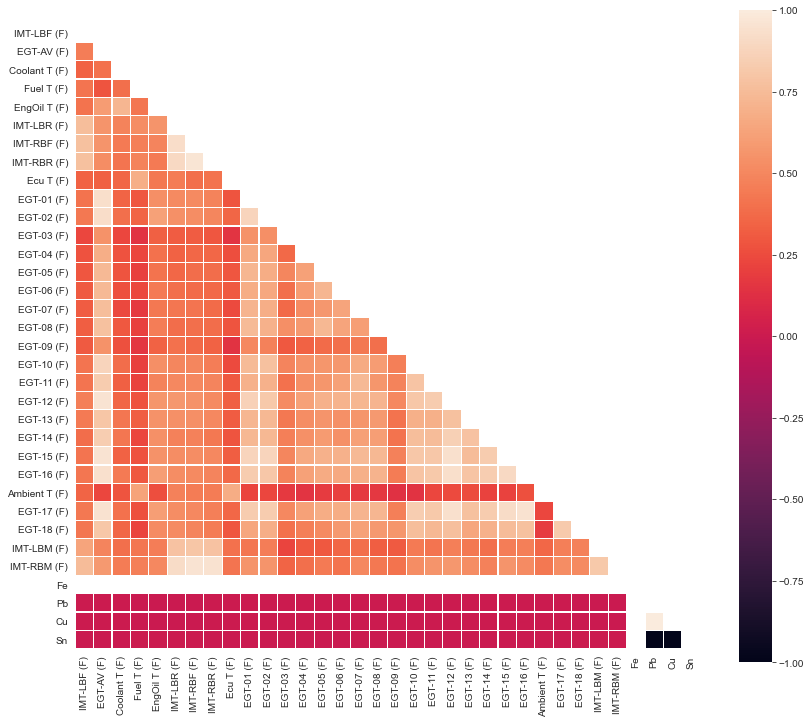

In [38]:
heat_map(corr_matrix490)

### Intermediate inspection 483

In [39]:
corr_matrix483 = filt_df_mv483_2.corr(method='pearson')

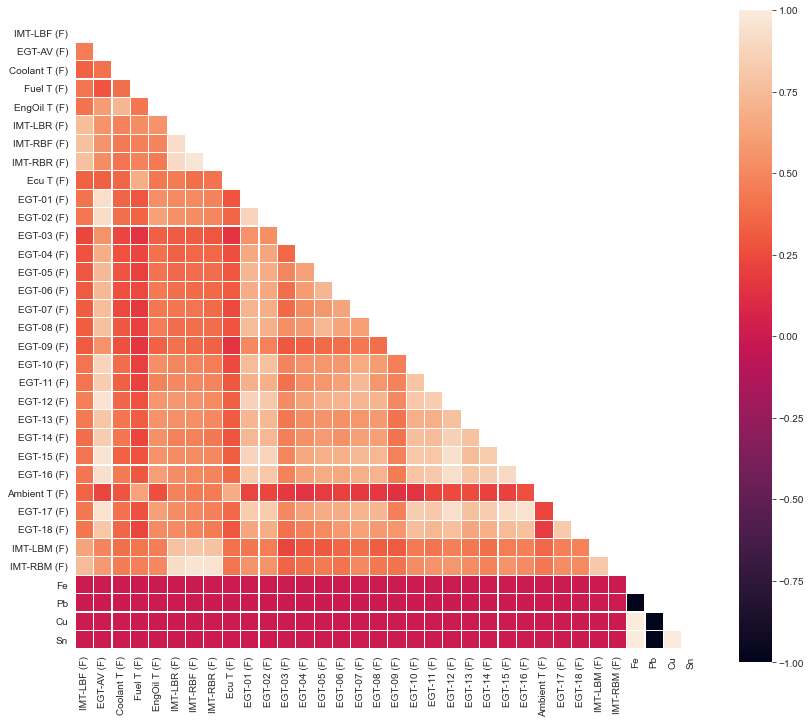

In [40]:
heat_map(corr_matrix483)

### Intermediate inspection 360

In [41]:
corr_matrix360 = filt_df_mv360_2.corr(method='pearson')

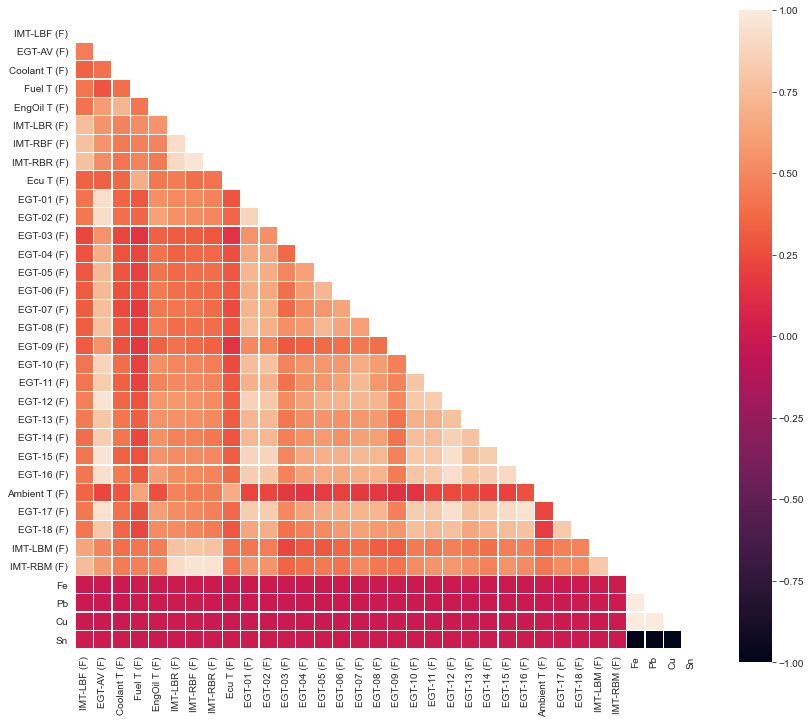

In [42]:
heat_map(corr_matrix360)

### Intermediate inspection 554

In [43]:
corr_matrix554 = filt_df_mv554_2.corr(method='pearson')

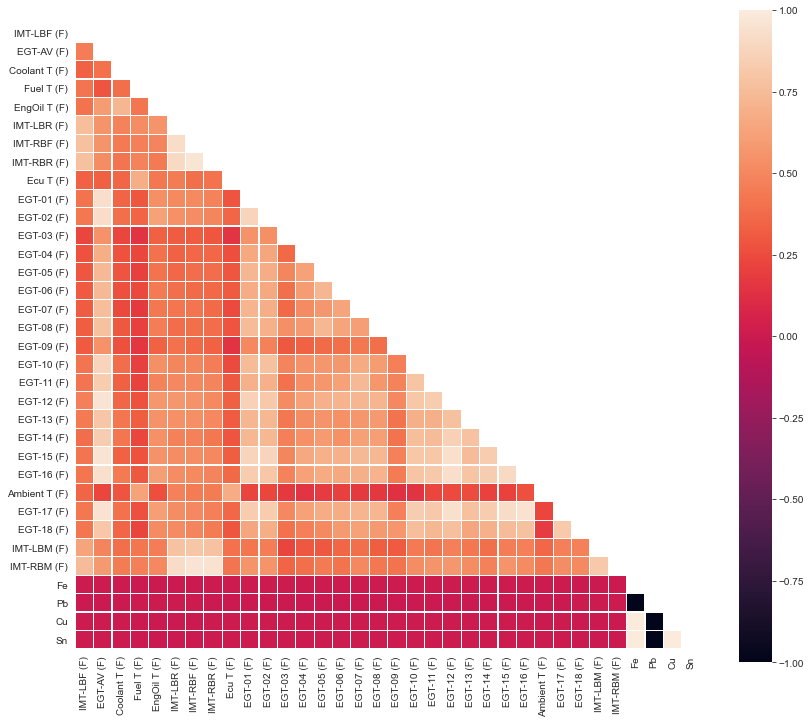

In [44]:
heat_map(corr_matrix554)

## **Conclusions**

* An analysis of the correlation between the filter metal values and every other attribute has been carried out in order to evaluate the feasability to stablish a relationship among them.
* Regarding the first application of the correlation matrix, it can be observe that the best correlated attribute is **ESN** for the metal value with positive correlation for **Si** and negative correlation for **Na**, **Ca** and **P**.  
* The correlation mentioned above could be improved removing the outliers.
* With regard to the second application of the correlation matrix, it can be observed that there are not correlations between every metal value and the filter vital signs related to combustion.
* Despite having found a correlation between one attibute and just a few metal values, there is not correlation between the filter vital signs and the most important metal values: **Fe**, **Cr**, **Pb**, **Cu**, **Sn** and **Al**, overall.